In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset to python environment.

In [2]:
data=pd.read_csv('desktop/bank-direct-marketing-campaigns.csv')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
#check the columns
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# Check for the null values present in the dataset.

In [5]:
data.isnull().sum()

age                0
job                0
marital            0
education          0
default            0
housing            0
loan               0
contact            0
month              0
day_of_week        0
campaign          23
pdays             31
previous          20
poutcome           0
emp.var.rate       0
cons.price.idx     0
cons.conf.idx      0
euribor3m          0
nr.employed        0
y                  0
dtype: int64

null value present in 3 rows campaign,pdays and pervious respectively

In [6]:
for i in ['campaign', 'pdays','previous']:
    data[i]=data[i].fillna(data[i].median())

In [7]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

still null value is clear

# univariate analysis

In [8]:
data.shape

(41188, 20)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  float64
 11  pdays           41188 non-null  float64
 12  previous        41188 non-null  float64
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [10]:
#both numerical and catagrical value in the data set

In [11]:
# we plot numerical value and check sknues

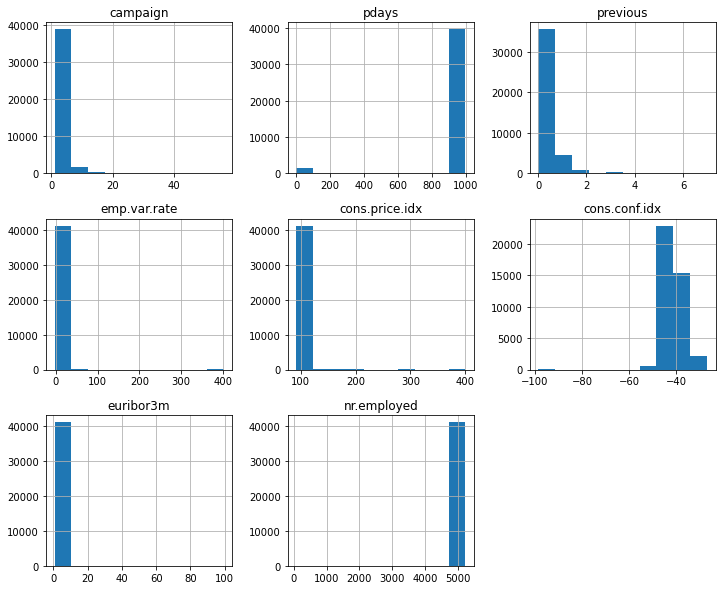

In [12]:
freqgarph=data.select_dtypes(include=['float'])
freqgarph.hist(figsize=(12,10))
plt.show()

# spliting by obeject in some combination

In [13]:
#used by groupby function


In [14]:
data[["job",'nr.employed']].groupby("job").mean()

,nr.employed
job,
admin.,5162.181280
blue-collar,5171.985801
entrepreneur,5176.313530
housemaid,5174.689906
management,5164.926505
retired,5122.262151
self-employed,5170.674384
services,5171.600126
student,5085.939086


#  some visualizations in this dataset

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

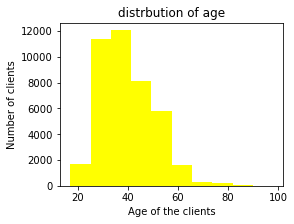

In [15]:
# Creating a histogram for the ages
plt.figure(figsize=(4,3))
plt.hist(data['age'],color='yellow')
plt.xlabel('Age of the clients')
plt.ylabel('Number of clients')
plt.title('distrbution of age')
plt.xticks()
plt.yticks()

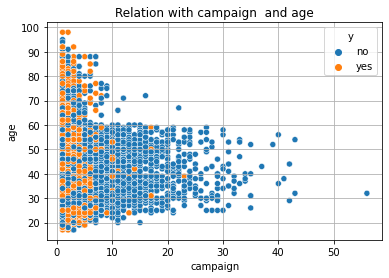

In [16]:
#scatterplot
plt.figure()
sns.scatterplot(x='campaign',y='age',hue='y',data=data)
plt.title('Relation with campaign  and age')
plt.grid()


In [17]:
data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

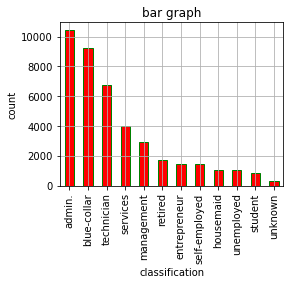

In [18]:
# bar graph for job
data['job'].value_counts().plot(kind='bar',color='red',edgecolor='green',figsize=(4,3))
plt.title("bar graph")
plt.xlabel("classification")
plt.ylabel("count")
plt.grid()

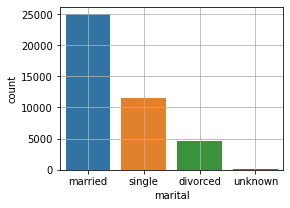

In [19]:
import warnings
warnings.filterwarnings('ignore')
#countplot for marital status
plt.figure(figsize=(4,3))
sns.countplot(data['marital'])
plt.grid()

In [20]:
#just understand data (discreptive analayising)

data.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.568078,962.475454,0.172769,0.101814,93.618865,-40.507000,3.647593,5164.994795
std,10.42125,2.769826,186.910907,0.494625,2.600404,2.644491,4.652951,2.213519,123.313419
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-98.600000,0.634000,79.000000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,402.000000,400.234000,-26.900000,99.400000,5228.100000


In [21]:
#in the dataset 41188 respones 
#the avg value age is 40 and sd 10.4
#the avg value campaign score is 2.5 sd 2.74
#the avg value pdays 962.44  and sd 186.97

In [22]:
data['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

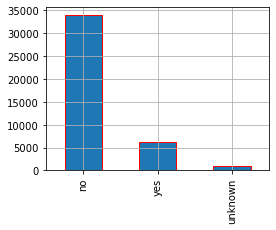

In [23]:
plt.figure(figsize=(4,3))
data['loan'].value_counts().plot(kind='bar',edgecolor='red')
plt.grid()

# Bivariate Analysis

# one way anova

# cons.price.idx  same in all  loan group

In [24]:
#set the hypothesis

In [25]:
#h0:cons.price.idx same in all loan group
#h1 or ha: cons.price.idx differnt in all loan group

In [26]:
#state significance level 
# alpha value=0.01

In [27]:
#which test can be choose
#here can be used in o anova becouse 3 variable can be check
# and used one way anova because here check in means


In [28]:
data['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [29]:
NO=data[data['loan']=='no']


In [30]:
YES=data[data['loan']=='yes']


In [31]:
UNKNOWN=data[data['loan']=='unknown']


In [32]:
import scipy.stats as st


In [33]:
ano=st.f_oneway(NO['cons.price.idx'],YES['cons.price.idx'],UNKNOWN['cons.price.idx'])

In [34]:
ano

F_onewayResult(statistic=1.1680398924078956, pvalue=0.3109861918203066)

In [35]:
data.groupby('loan')['cons.price.idx'].mean()

loan
no         93.618738
unknown    93.738799
yes        93.600549
Name: cons.price.idx, dtype: float64

In [36]:
# p value 0.31 alpha value=0.01
#p value>o.o1 we will accept our null hypothesis 
#cons.price.idx same in all loan group

# any relationship between job and loan

# chi square test

In [37]:
#job and loan are catagorical variabele
#so we can check the realetion ship so it  is chi square test
#comparision only ferquancy level 

In [38]:
#set the hypothesis

In [39]:
#null hypothesis h0:job and loan are independent
#alternative hypothesis ha: job and loan are dependend


In [40]:
#set the siginificanc level
#alpha=0.01

In [41]:
ct=pd.crosstab(data['job'],data['loan'])

In [42]:
ct

loan,no,unknown,yes
job,,,
admin.,8485,227,1710
blue-collar,7648,240,1366
entrepreneur,1214,36,206
housemaid,877,29,154
management,2414,71,439
retired,1436,44,240
self-employed,1186,40,195
services,3267,101,601
student,710,23,142


In [43]:
import scipy.stats as stats

In [44]:
stats.chi2_contingency(ct)

(30.600386816241073,
 0.10458707529906479,
 22,
 array([[8.59053365e+03, 2.50504516e+02, 1.58096183e+03],
        [7.62778722e+03, 2.22430320e+02, 1.40378246e+03],
        [1.20013596e+03, 3.49966010e+01, 2.20867437e+02],
        [8.73725357e+02, 2.54782946e+01, 1.60796348e+02],
        [2.41016315e+03, 7.02816354e+01, 4.43555210e+02],
        [1.41774303e+03, 4.13421385e+01, 2.60914830e+02],
        [1.17128654e+03, 3.41553365e+01, 2.15558124e+02],
        [3.27152447e+03, 9.53993882e+01, 6.02076139e+02],
        [7.21235554e+02, 2.10316111e+01, 1.32732835e+02],
        [5.55804725e+03, 1.62075605e+02, 1.02287715e+03],
        [8.35808973e+02, 2.43726328e+01, 1.53818394e+02],
        [2.72008838e+02, 7.93192192e+00, 5.00592406e+01]]))

In [45]:
# (30.600386816241073,-chi square test statstic
# 0.10458707529906479, -p value
# 22,  -degree of freedom          
                                
                             


In [46]:
# p value 0.104587 alpha value=0.01
#p value>0.01 we will accept our null hypothesis
#job and loan are independed